In [1]:
#Inspired by https://www.kaggle.com/fahd09/eda-of-crime-in-chicago-2005-2016
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import plotly.plotly as py

In [2]:
shooting_data=pd.read_csv("Rochester_Shooting_Victims.csv")
homicide_data =pd.read_csv("RochesterNY_Homicides.csv")
all_crime_data=pd.read_csv("RPD__Part_I_Crime_2011_to_Present.csv")

In [3]:
all_crime_data['time_index']=all_crime_data['OccurredFrom_Timestamp']

In [5]:
shooting_data['time_index']=shooting_data['Occurred_Date']

In [6]:
homicide_data['time_index']=homicide_data['OccurredDate']

In [7]:
shooting_data['Statute_Text']="shooting"

In [8]:
homicide_data['Statute_Text']="homicide"

In [9]:
frames = [all_crime_data, shooting_data, homicide_data]

In [10]:
#combine all 3 datasets
result = pd.concat(frames)

In [12]:
result.index=pd.DatetimeIndex(result.time_index)

In [13]:
#filter data to the ones from 2011 only because the largest one do not have anything before 2011
all_crimes_from2011=result[result.index>=np.datetime64('2011-01-01')]

In [122]:
#But in case we want to explore individually
all_crime_data.index=pd.DatetimeIndex(pd.to_datetime(all_crime_data.OccurredFrom_Timestamp))
shooting_data.index=pd.DatetimeIndex(pd.to_datetime(shooting_data.Occurred_Date))
homicide_data.index=pd.DatetimeIndex(pd.to_datetime(homicide_data.OccurredDate))

Text(0,0.5,u'Number of crimes')

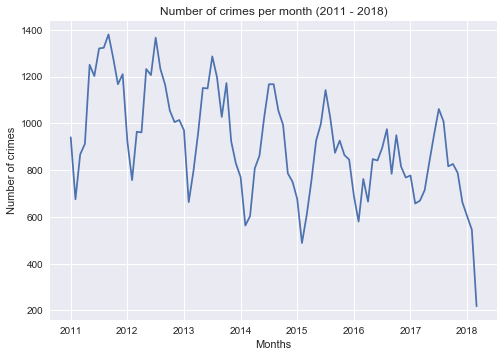

In [123]:
all_crimes_from2011.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2011 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')

Text(0,0.5,u'Number of homicide')

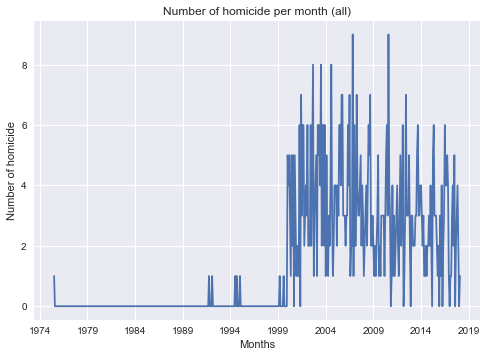

In [124]:
homicide_data.resample('M').size().plot(legend=False)
plt.title('Number of homicide per month (all)')
plt.xlabel('Months')
plt.ylabel('Number of homicide')

Text(0,0.5,u'Number of shootings')

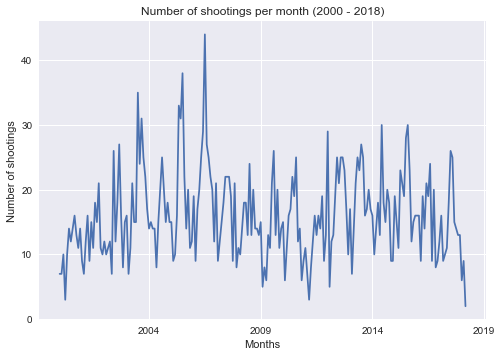

In [125]:
shooting_data.resample('M').size().plot(legend=False)
plt.title('Number of shootings per month (2000 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of shootings')

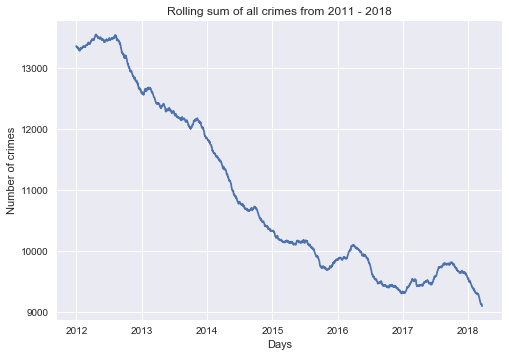

In [126]:
#The idea is, for each day, we calculate the sum of crimes of the past year (365 days). 
#If this rolling sum is decreasing, then we know for sure that crime rates have been decreasing during that year.
#On the other hand, if the rolling sum stays the same during a given year, then we can conclude that crime rates stayed the same.plt.show()
all_crime_data.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2011 - 2018')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

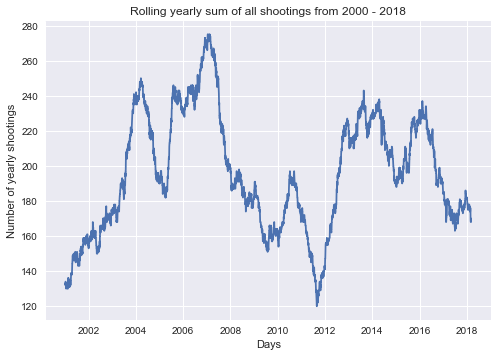

In [127]:
shooting_data.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling yearly sum of all shootings from 2000 - 2018')
plt.ylabel('Number of yearly shootings')
plt.xlabel('Days')
plt.show()

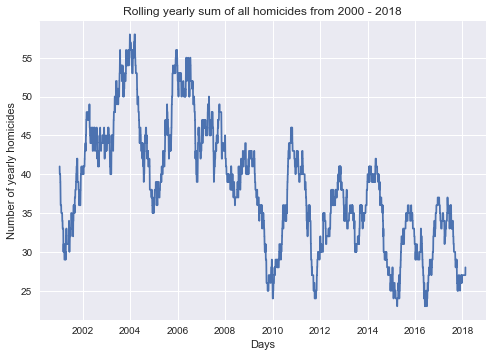

In [128]:
homicide_data_2000onwards.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling yearly sum of all homicides from 2000 - 2018')
plt.ylabel('Number of yearly homicides')
plt.xlabel('Days')
plt.show()

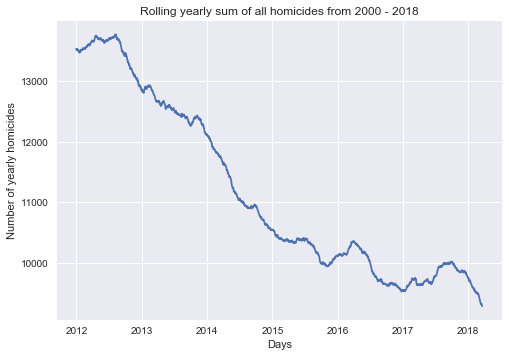

In [27]:
all_crimes_from2011.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling yearly sum of all homicides from 2000 - 2018')
plt.ylabel('Number of yearly homicides')
plt.xlabel('Days')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b1b7850>,
      dtype=object)

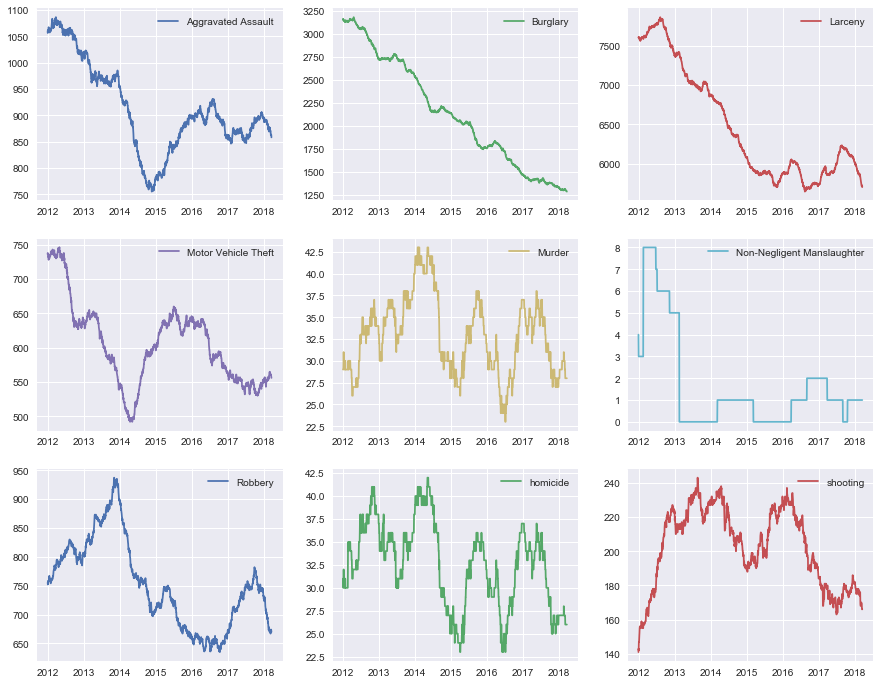

In [32]:
all_crimes_from2011_dailycount = all_crimes_from2011.pivot_table('OBJECTID', aggfunc=np.size, columns='Statute_Text', index=all_crimes_from2011.index.date, fill_value=0)
all_crimes_from2011_dailycount.index = pd.DatetimeIndex(all_crimes_from2011_dailycount.index)
all_crimes_from2011_dailycount.rolling(365).sum().plot(figsize=(15, 12), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [129]:
#It seems that Aggravated assault and Motor Vehicle theft started to dropped around 2013-2014 but bounced back abit since then;
#Robbery on the other hand peaked around 2013-2014
#Burglary and Larceny dropped throughout the years. Murder numbers have not changed much.
#Shooting numbers seem to have been dropping since 2016 but homicide numbers have not decreased too many yet.

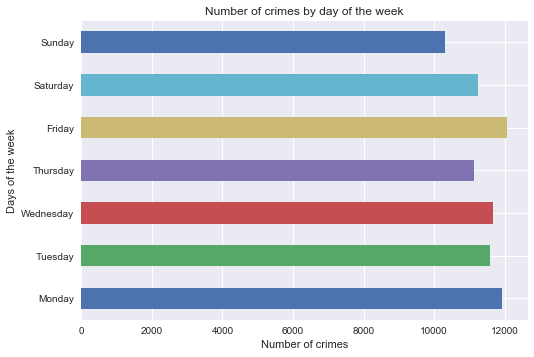

In [130]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
all_crimes_from2011.groupby([all_crimes_from2011.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

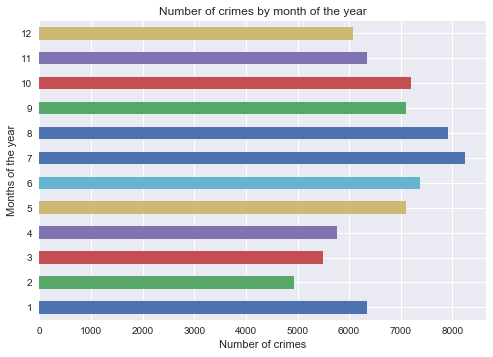

In [131]:
all_crimes_from2011.groupby([all_crimes_from2011.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

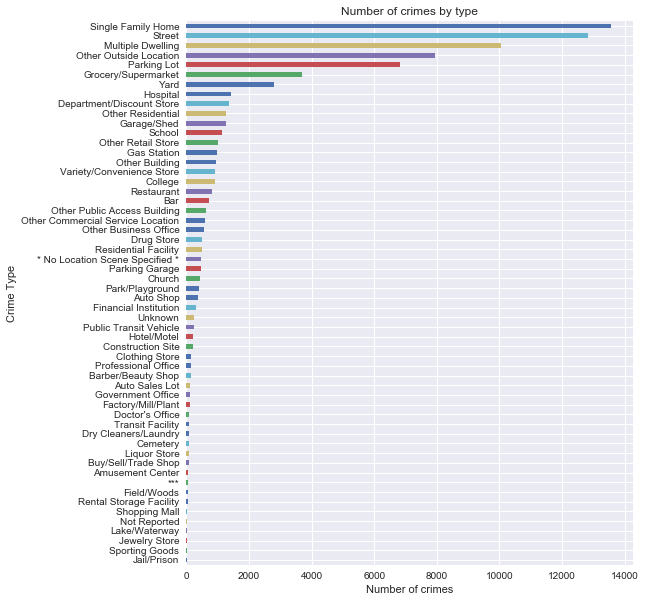

In [132]:
plt.figure(figsize=(8,10))
all_crimes_from2011.groupby([all_crimes_from2011['Location_Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [133]:
#Not all crimes are the same. Some crimes types are more likely to occur than other types depending on the place and time. 

In [134]:
#After seeing the base rates of each crime location and type, 
#we will now assume that all crime types (and locations) have the same frequency or, 
#in other words, they are all equal overall. 
#We are interested in detecting how a specific crime type is different across all days of the week or hours of the day.

In [135]:
#Is theft or burglary is more likely to occur at a weekday compared to a weekend? 
#Are they more likely to happen in the morning vs evening or late night ? 
#Are they more likely to occur in a street vs a bar?

In [136]:
hour_by_location = all_crimes_from2011.pivot_table(values='OBJECTID', index='Location_Type', columns=all_crimes_from2011.index.hour, aggfunc=np.size).fillna(0)

In [137]:
hour_by_location = all_crimes_from2011.pivot_table(values='OBJECTID', index='Location_Type', columns=all_crimes_from2011.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = all_crimes_from2011.pivot_table(values='OBJECTID', index='Statute_Text', columns=all_crimes_from2011.index.hour, aggfunc=np.size).fillna(0)

In [138]:
#hour_by_type_all = all_crimes_from2011.pivot_table(values='OBJECTID', index='Statute_Text', columns=all_crimes_from2011.index.hour, aggfunc=np.size).fillna(0)

In [139]:
dayofweek_by_location = all_crimes_from2011.pivot_table(values='OBJECTID', index='Location_Type', columns=all_crimes_from2011.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = all_crimes_from2011.pivot_table(values='OBJECTID', index='Statute_Text', columns=all_crimes_from2011.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type  = all_crimes_from2011.pivot_table(values='OBJECTID', index='Location_Type', columns='Statute_Text', aggfunc=np.size).fillna(0)

In [46]:
#dayofweek_by_type_all=all_crimes_from2011.pivot_table(values='OBJECTID', index='Statute_Text', columns=all_crimes_from2011.index.dayofweek, aggfunc=np.size).fillna(0)

In [47]:
from sklearn.cluster import AgglomerativeClustering as AC

In [48]:
def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

In [49]:
def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()

In [50]:
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

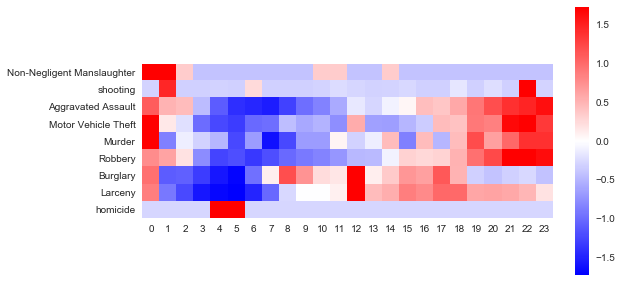

In [90]:
scale_and_plot(hour_by_type)

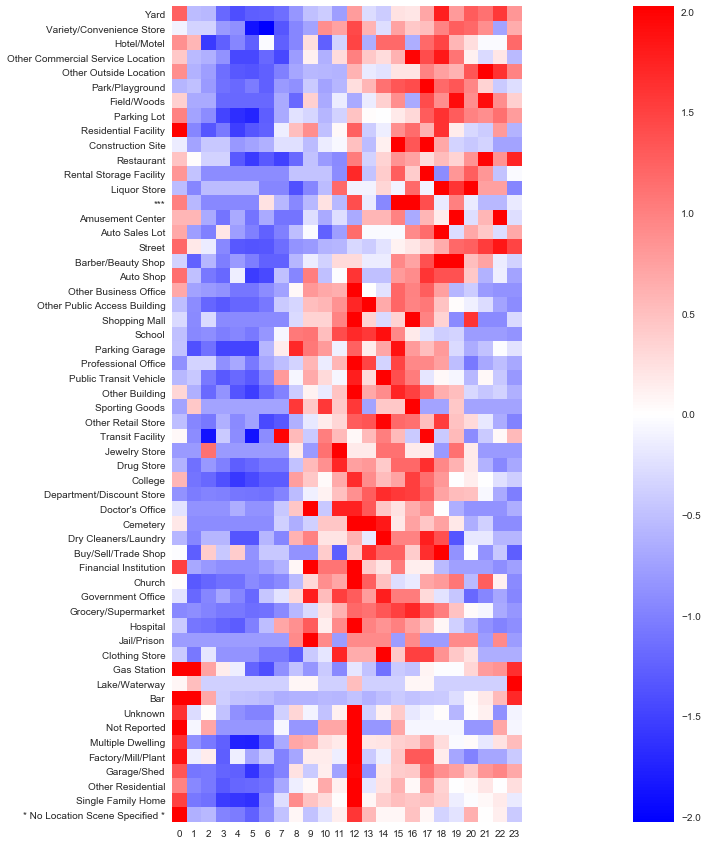

In [91]:
plt.figure(figsize=(40,15))
scale_and_plot(hour_by_location)

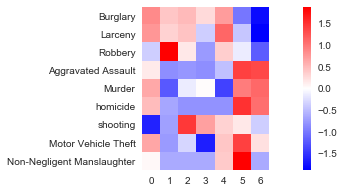

In [92]:
plt.figure(figsize=(12,3))
scale_and_plot(dayofweek_by_type)

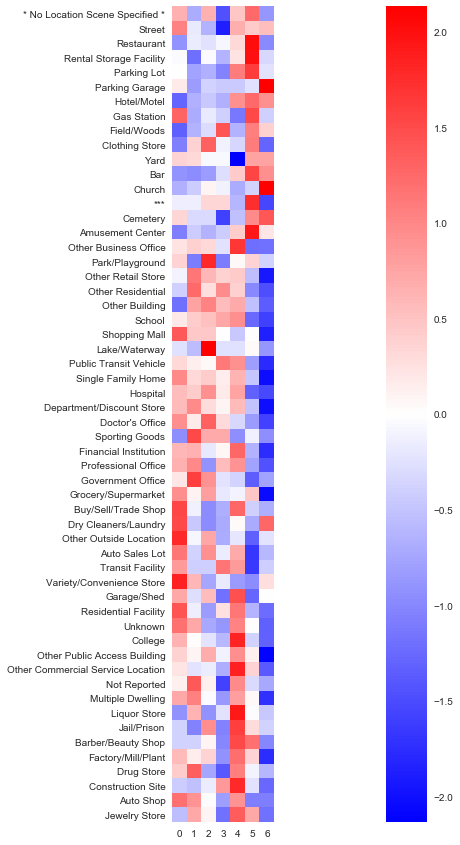

In [93]:
plt.figure(figsize=(40,15))
scale_and_plot(dayofweek_by_location)

In [94]:
#Where a certain crime type is most likely to happen?

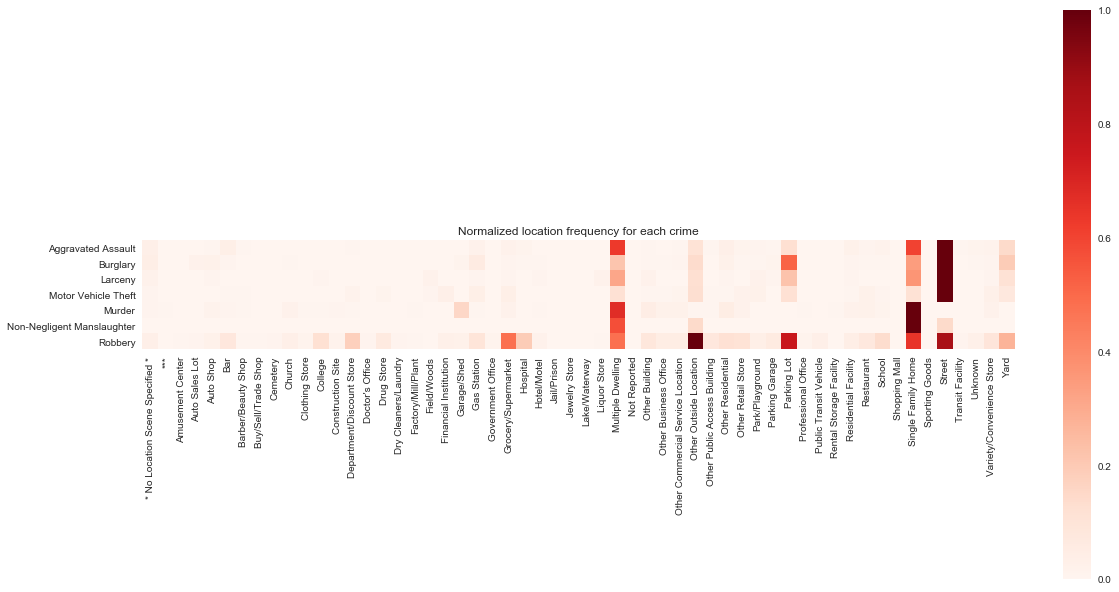

In [95]:
df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

In [96]:
from pandas.tseries.holiday import *

In [97]:
cal=USFederalHolidayCalendar()

In [98]:
holidays = cal.holidays(start=all_crime_data.index.min(), end=all_crime_data.index.max())

In [99]:
all_crimes_from2011.loc[:,('Holiday')]=all_crimes_from2011.index.isin(holidays)

In [100]:
from pandas import Series
from matplotlib import pyplot
from numpy import polyfit

In [101]:
daily_count=all_crimes_from2011.resample('D').size()

In [102]:
X = daily_count.values

In [103]:
diff = list()
days_in_year = 365

In [104]:
for i in range(days_in_year, len(X)):
	month_str = str(daily_count.index[i].year-1)+'-'+str(daily_count.index[i].month)
	month_mean_last_year = daily_count[month_str].mean()
	value = X[i] - month_mean_last_year
	diff.append(value)

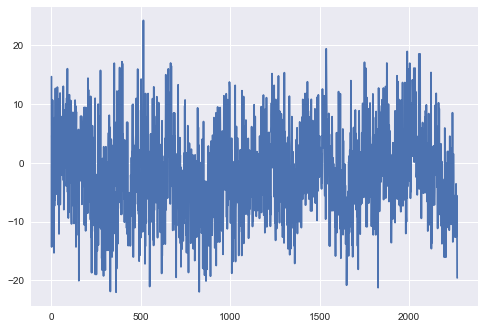

In [105]:
pyplot.plot(diff)
pyplot.show()
#seasonality adjusted daily crime data

In [106]:
hol_data=all_crimes_from2011[all_crimes_from2011['Holiday']]

In [107]:
daily_count_holiday=hol_data.resample('D').size()

In [108]:
X_holiday = daily_count_holiday.values

In [109]:
diff_holiday = list()
for i in range(days_in_year, len(X_holiday)):
	month_str = str(daily_count_holiday.index[i].year-1)+'-'+str(daily_count_holiday.index[i].month)
	month_mean_last_year = daily_count[month_str].mean()
	value = X_holiday[i] - month_mean_last_year
	diff_holiday.append(value)

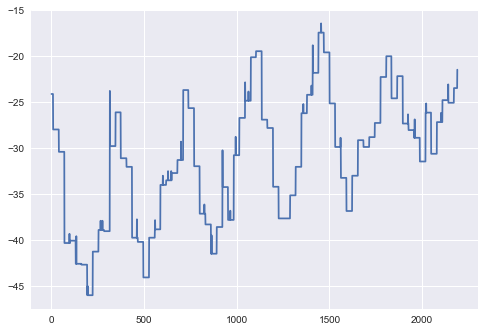

In [110]:
pyplot.plot(diff_holiday)
pyplot.show()
#seasonality adjusted holiday crime data

In [111]:
#There appear to be significantly fewer crimes happening during federal holidays than other days

In [112]:
all_crime_data2=all_crimes_from2011

In [113]:
all_crime_data2.loc[:,('hour')] = [ts.hour for ts in all_crime_data2.index]

In [114]:
count_byhour= all_crime_data2.groupby(all_crime_data2.index.hour).count()['OBJECTID']

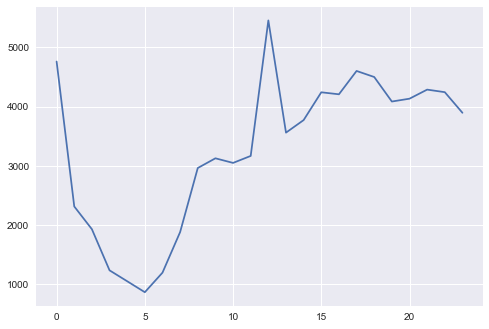

In [115]:
plt.plot(count_byhour)
#hourly crime number

In [116]:
all_crime_data2.loc[:,('Time')] = pd.to_datetime(all_crime_data2['OccurredFrom_Timestamp'])

In [117]:
all_crime_data2.loc[:,('TimeofDay')]=pd.to_datetime(all_crime_data2['Time'], format='%H:%M').dt.time

In [118]:
count_bytimeofday= all_crime_data2.groupby(all_crime_data2.TimeofDay).count()['OBJECTID']

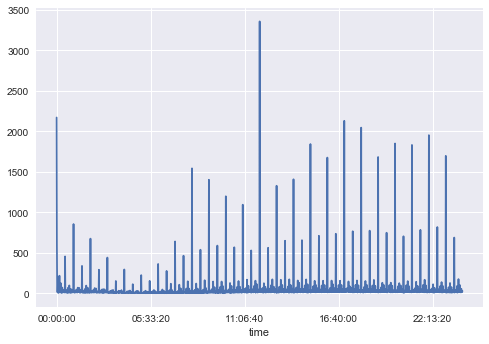

In [119]:
plt.plot(count_bytimeofday)
#exact time crime number

In [120]:
# No obvious crime number spike during shift changes at 7am, 3pm, 11pm